**Работа выполнена студенткой группы БЭК181 Кордзахия Натела**

## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [1]:
import numpy as np

In [2]:
def mat_vander(x):
    a = np.asarray(x)
    b = a[:, np.newaxis] 
    return b ** np.arange(len(a))

In [3]:
x = list(map(int, input().split()))

3 0 5


In [4]:
print(mat_vander(x))

[[ 1  3  9]
 [ 1  0  0]
 [ 1  5 25]]


Я проверила данную функцию в случаях, если ничего не вводить, тогда получается такой вывод: [ ]

Если проверить 0, то он выдаст 0^0=1, я не уверена, что это верно, но никаких уточнений по этому поводу я не получила.

Также при вводе списка, состоящего из одного значения, выводится 1. Я прочитала теорию, но такие случаи не рассматриваются.

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [5]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
n = 5

**Первый пункт**

Это выше моих сил написать все без циклов

In [7]:
def generate_matrix(n):
    results = np.zeros((10**4, 4, n))
   
    for i in range(10**4):
        results[i, 0] = np.random.exponential(1, n)
        results[i, 1] = np.random.normal(1, 1, n)
        results[i, 2] = np.random.poisson(1, n)
        results[i, 3] = np.random.binomial(n = 1, p = 0.5, size = n) * 2
   
    return results

In [8]:
def get_round_results(round_results):
    results = {}
    results['pooh'] = np.sum(round_results[0])
    results['piglet'] = np.sum(round_results[1])
    results['rabbit'] = np.sum(round_results[2])
    results['ia'] = np.sum(round_results[3])
   
    winner_result = max(results.values())
    return list(results.keys())[list(results.values()).index(winner_result)]

In [9]:
def get_game_results(matrix):
    c = Counter()
    for i in range(10**4):
        c[get_round_results(matrix[i])] += 1
       
    return c

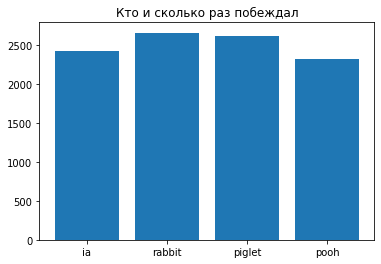

In [10]:
matrix = generate_matrix(n)
get_game_results(matrix)
 
labels, values = zip(*get_game_results(matrix).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.title('Кто и сколько раз побеждал') # я не знаю, как ее подписать
plt.show()

**Второй пункт**

In [15]:
def generate_matrix(n):
    results = np.zeros((10**4, 4, n))
   
    for i in range(10**4):
        results[i, 0] = np.random.exponential(1, n) + np.random.normal(1, 1, n)
        results[i, 1] = np.random.poisson(1, n) + np.random.binomial(n = 1, p = 0.5, size = n) * 2
   
    return results

In [16]:
def get_round_results(round_results):
    results = {}
    results['pooh & piglet'] = np.sum(round_results[0])
    results['rabbit & ia'] = np.sum(round_results[1])

    winner_result = max(results.values())
    return list(results.keys())[list(results.values()).index(winner_result)]

In [17]:
def get_game_results(matrix):
    c = Counter()
    for i in range(10**4):
        c[get_round_results(matrix[i])] += 1
       
    return c

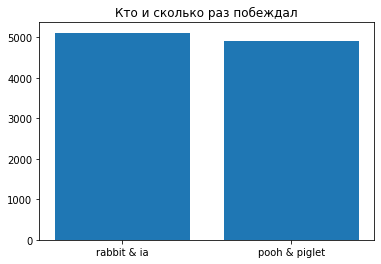

In [18]:
matrix = generate_matrix(n)
get_game_results(matrix)
 
labels, values = zip(*get_game_results(matrix).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.title('Кто и сколько раз побеждал') # я не знаю, как ее подписать
plt.show()

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [20]:
def get_page(search, page):
    url = 'https://www.avito.ru/moskva?q={}&p={}'.format(search, page)
    res = requests.get(url)
    html = res.content
    tree = BeautifulSoup(html, 'html.parser')
    ads = tree.find("div", {'class':'snippet-list js-catalog_serp'}).find_all('div',{'class':'snippet-horizontal'})
    infa = []
    for ad in ads:
            try:
                title = ad.find('div', {'class':'description'}).find('h3').text.strip()
            except:
                title = 'None'
            try:
                url = 'https://www.avito.ru' + ad.find('div', {'class':'description'}).find('h3').find('a').get('href')
            except:
                url = 'None'
            try:
                price = ad.find('span',{'class':'snippet-price'}).text.strip()
            except:
                price = 'None'
            try:
                metro = ad.find('span',{'class':'item-address-georeferences-item__content'}).text.strip()
            except:
                metro = 'None'
            try:
                distance = ad.find('span',{'class': 'item-address-georeferences-item__after'}).text.strip()
            except:
                distance = 'None'
                
            infa.append({'Товар': title,
                 'Ссылка на объявление': url,
                 'Цена': price,
                 'Метро': metro,
                 'Расстояние от метро': distance})
    df = pd.DataFrame(infa)
    
    return df

In [21]:
get_page('жесткий диск', 1)

,Товар,Ссылка на объявление,Цена,Метро,Расстояние от метро
0,2 диска WD Green по 3 Тб + Netgear Readynas pro 2,https://www.avito.ru/moskva/tovary_dlya_kompyu...,10 000 ₽,Алтуфьево,1 км
1,Разные SSD Новые,https://www.avito.ru/moskva/tovary_dlya_kompyu...,16 000 ₽,Новокосино,900 м
2,"Оперативная память HP, IBM, dell,Lenovo",https://www.avito.ru/moskva/tovary_dlya_kompyu...,990 ₽,Новокосино,300 м
3,Жесткий диск seagate ST35.5 1TB ST1000VX000,https://www.avito.ru/moskva/tovary_dlya_kompyu...,2 000 ₽,Улица академика Янгеля,"2,9 км"
4,Жёсткий диск HDD 160 Gb,https://www.avito.ru/moskva/tovary_dlya_kompyu...,400 ₽,Славянский бульвар,"2,2 км"
5,Жесткий диск EMC 005049250 V3-2S10-600U,https://www.avito.ru/moskva/tovary_dlya_kompyu...,990 ₽,Новокосино,100 м
6,Жесткий диск WD 4tb gold,https://www.avito.ru/moskva/tovary_dlya_kompyu...,9 500 ₽,Владыкино,None
7,"Жесткий диск 3,5"" Seagate 500Gb",https://www.avito.ru/moskva/tovary_dlya_kompyu...,400 ₽,Сходненская,"1,2 км"
8,Жесткий диск Seagate ST3300657SS 300Gb SAS 3.5,https://www.avito.ru/moskva/tovary_dlya_kompyu...,4 000 ₽,Дмитровская,None
9,Жесткий диск WD Purple 3Тб,https://www.avito.ru/moskva/tovary_dlya_kompyu...,5 000 ₽,Щелковская,700 м


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [22]:
!pip3 install plotly-express
!pip3 install nbformat==4.2.0
!pip3 install matplotlib==3.1.2
!pip3 install datetime

In [1]:
import pandas as pd
import numpy as np
import pickle

# Модули для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
from pylab import rcParams
%config InlineBackend.figure_format = 'svg' # Графики в svg выглядят четче

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
df = pd.read_csv('walmart.csv')

**Первый пункт**

Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.

In [3]:
df.head() 

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
df.tail() 

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
df # ну ведь так тоже можно :) 

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [6]:
print("Количество наблюдений:", df.shape[0])
print("Количество переменных:", df.shape[1])

Количество наблюдений: 418239
Количество переменных: 16


In [7]:
df.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [8]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [9]:
df.dtypes #просто проверка себя

Store                    int64
Date            datetime64[ns]
Dept                     int64
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

**Второй пункт** 

Разобраться с пропущенными значениями:
вывести сколько пропущенных значений в процентах есть в каждой переменной;
удалить переменные, которые имеют более 60% пропущенных значений.

In [10]:
def mis_val_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        table = pd.concat([mis_val, mis_val_percent], axis=1, 
                          keys=['Кол-во пропущенных значений','     % от общего количества'])
        return table[table.iloc[:,1] != 0]
print(mis_val_table(df))

           Кол-во пропущенных значений       % от общего количества
MarkDown1                       270755                    64.736909
MarkDown2                       310095                    74.143014
MarkDown3                       283671                    67.825095
MarkDown4                       285924                    68.363782
MarkDown5                       270057                    64.570019


Оказывается, нам надо удалить все МаркДауны, но давайте сделаем это в общем виде

In [11]:
dff = df.dropna(axis=1, thresh = np.shape(df)[0] * 0.6)

In [12]:
dff.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


**Третий пункт**

Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные?

In [13]:
print('Количество магазинов:', len(dff['Store'].value_counts()))
print('Количество отделов:', len(dff['Dept'].value_counts()))

Количество магазинов: 45
Количество отделов: 81


In [14]:
print('Период с {} по {}'.format(min(dff['Date']), max(dff['Date'])))

Период с 2010-02-05 00:00:00 по 2012-10-19 00:00:00


In [15]:
# если честно, без времени мне нравится больше, поэтому я немного перепишу
print('Период с', min(dff['Date']).date(),'по', max(dff['Date']).date())

Период с 2010-02-05 по 2012-10-19


**Четвертый пункт** 

Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.

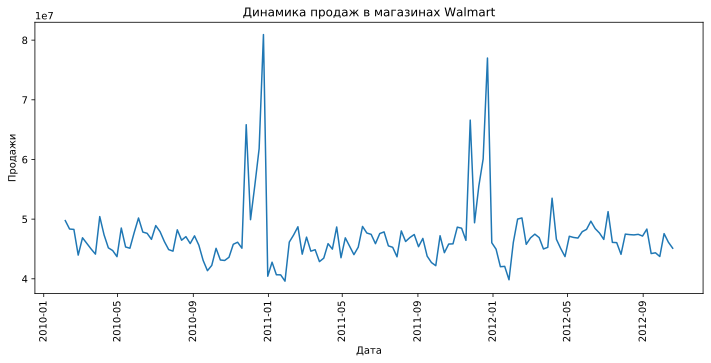

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

plt.plot(dff[['Weekly_Sales', 'Date']].groupby('Date').sum())
plt.title('Динамика продаж в магазинах Walmart')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

**Пятый пункт**

Найдите и нарисуйте матрицу корреляции для числовых показателей.

In [17]:
dff_num = dff[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

Text(0.5, 1, 'Матрица корреляции для числовых показателей')

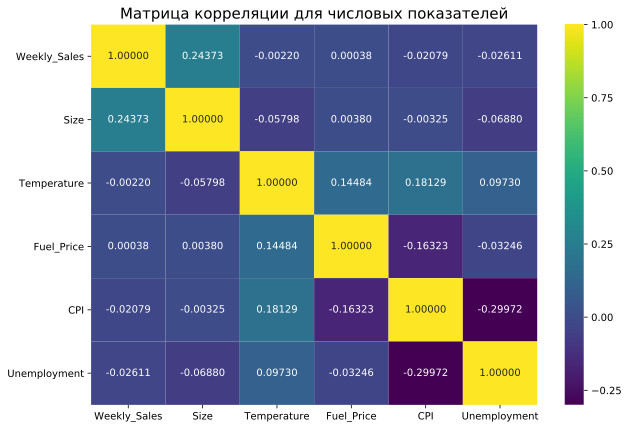

In [18]:
plt.subplots(figsize=(10,7))
sns.heatmap(dff_num.corr(), annot=True, fmt=".5f", cmap="viridis")
plt.title('Матрица корреляции для числовых показателей', fontsize=15)

**Шестой пункт**

Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.

In [19]:
df_top = dff[['Store','Date','Weekly_Sales']]
df_top = df_top.groupby('Store', as_index=False).sum().nlargest(5,'Weekly_Sales')
df_top

,Store,Weekly_Sales
19,20,2.993660e+08
3,4,2.973940e+08
13,14,2.872952e+08
12,13,2.844811e+08
1,2,2.735476e+08


In [20]:
df_trend = dff[['Store','Date','Weekly_Sales']]
df_trend = df_trend.groupby(by=['Date', 'Store'], as_index=False)['Weekly_Sales'].sum()
df_trend = df_trend.merge(df_top, on='Store')
df_trend.rename(columns={'Store' : 'Магазины', 
                        'Date':'Дата',
                        'Weekly_Sales_x':'Объём'}, 
                inplace=True)
df_trend

,Дата,Магазины,Объём,Weekly_Sales_y
0,2010-02-05,2,2136989.46,2.735476e+08
1,2010-02-12,2,2137809.50,2.735476e+08
2,2010-02-19,2,2124451.54,2.735476e+08
3,2010-02-26,2,1865097.27,2.735476e+08
4,2010-03-05,2,1991013.13,2.735476e+08
...,...,...,...,...
705,2012-09-21,20,2028587.24,2.993660e+08
706,2012-09-28,20,2008350.58,2.993660e+08
707,2012-10-05,20,2246411.89,2.993660e+08
708,2012-10-12,20,2162712.35,2.993660e+08


In [21]:
px.line(df_trend, 
        title='Топ-5 самых больших магазинов по суммарным продажам за все время',
        x='Дата', 
        y='Объём', 
        color='Магазины')

**Седьмой пункт**

Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [44]:
daf = dff[['Store','Date','Weekly_Sales','Type','Dept']]
daf = daf[daf['Type'].astype(str)=='A']
daf['Year'] = pd.DatetimeIndex(daf['Date']).year
daf = daf[daf['Year'].astype(str)=='2011']
daf['Dept#'] = 'Отдел ' + daf['Dept'].astype(str)
daf

,Store,Date,Weekly_Sales,Type,Dept,Year,Dept#
48,1,2011-01-07,15984.24,A,1,2011,Отдел 1
49,1,2011-01-14,17359.70,A,1,2011,Отдел 1
50,1,2011-01-21,17341.47,A,1,2011,Отдел 1
51,1,2011-01-28,18461.18,A,1,2011,Отдел 1
52,1,2011-02-04,21665.76,A,1,2011,Отдел 1
...,...,...,...,...,...,...,...
387956,41,2011-11-25,2354.48,A,99,2011,Отдел 99
387957,41,2011-12-09,773.53,A,99,2011,Отдел 99
387958,41,2011-12-16,3280.00,A,99,2011,Отдел 99
387959,41,2011-12-23,3000.00,A,99,2011,Отдел 99


In [45]:
top_10 = daf[['Weekly_Sales','Dept#']]
top_10 = top_10.groupby('Dept#', as_index=False).sum().nlargest(10,'Weekly_Sales')
top_10

,Dept#,Weekly_Sales
71,Отдел 92,1.290298e+08
74,Отдел 95,1.101521e+08
69,Отдел 90,8.260279e+07
30,Отдел 38,7.463045e+07
56,Отдел 72,6.697997e+07
70,Отдел 91,6.146740e+07
32,Отдел 40,6.057080e+07
10,Отдел 2,5.947513e+07
73,Отдел 94,5.827561e+07
72,Отдел 93,4.976862e+07


In [46]:
fig = px.bar(top_10, x='Dept#', y='Weekly_Sales', labels={'Dept#': 'Отделы', 'Weekly_Sales': 'Объем продаж'},
             title='Топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А')
fig

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [47]:
import datetime                  # Пакет для работы с временными форматами
import pickle                    # Пакет для подгрузки данных специфического для питона формата
import requests                  # Пакет для скачки данных из этих ваших интернетов
import pandas as pd              # Пакет для работы с таблицами
import numpy as np               # Пакет для работы с векторами и матрицами
import matplotlib.pyplot as plt  # Пакет для строительства графиков
import time            # Пакет для работы со временем. Например, помогает ставить заглушки 
                       # time.sleep(секунды), необходимые для того что ВК не банил нащего
                       # сборщика данных из-за слишком частых запросов
        
# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm

In [50]:
myid = '138687064'  # вставить номер странички(добавляйтесь в друзья ахах)

# версия используемого API
version = '5.103' 

# подгружаем токен из файлика на компьютере
with open('/Users/natelakordzakhiya/Desktop/kod1.txt') as f:
    token = f.read()


In [51]:
group_id = 'luchmag'

In [52]:
 # описываем метод, т.е. выгрузка участников группы
method = 'groups.getMembers'
 # параметры выгрузки - возраст и id группы
parameters = 'group_id={}&fields=bdate'.format(group_id)

In [53]:
def vk_download():
    # общая форма выкачки и привод данных к виду json
    url = 'https://api.vk.com/method/' + method + '?' \
    + parameters + '&offset=0' + '&access_token=' + token  + '&v=' + version    
    response = requests.get(url) 
    count = response.json()['response']['count']
    n = count // 1000 + 1
    # выкачаем, что есть 
    member = []
    for i in tqdm_notebook(range(n)): 
        # при помощи метода groups.getMembers получаем пользователей группы
        current_members = 'https://api.vk.com/method/' + method + '?' + parameters \
        + '&access_token=' + token + '&v=' + version + '&offset=' + str(1000*i)
        response = requests.get(current_members)
        infa_full = response.json() ['response']['items']
        member.extend(infa_full)
        members = pd.DataFrame(member)
        
        # перед следующим запросом немножко подождем
        time.sleep(0.4)
    members = members.drop(axis = 1, labels = ['first_name','last_name','is_closed','can_access_closed', 'deactivated'])    
    return members

In [54]:
members = vk_download()
members[:10]

,id,bdate
0,1820,NaN
1,3398,6.6
2,4605,18.11.1988
3,7288,22.11
4,15544,15.2
5,21353,23.11
6,27606,7.1.1987
7,29990,NaN
8,41878,19.4
9,42279,10.7


Ураааа, успех!!!!

Дело за малым, все почистить и оформить 

Упс, не успела


In [63]:
# n = members
n.dropna(subset=['bdate'], inplace=True)

Понимаю, что не пройдет, но в черновике было норм, сейчас уже не успею.

Если переименовать параметр выкачки в members на n и сделать действие выше, все чиститься и даты остаются без Nan.

Я просто не успеваю это сделать, но я более чем уверена, что это так